In [1]:
### READ THE README.md FILE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats
from scipy.stats import norm
from scipy.stats import skew

#train = pd.read_csv('./Pandas_labs/pandas-titanic-lab/train.csv')
train = pd.read_csv('train.csv')

In [2]:
## Step 1: Reading the data

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Overview

train.shape
#train.columns
#train.info()
#train.describe()

(891, 12)

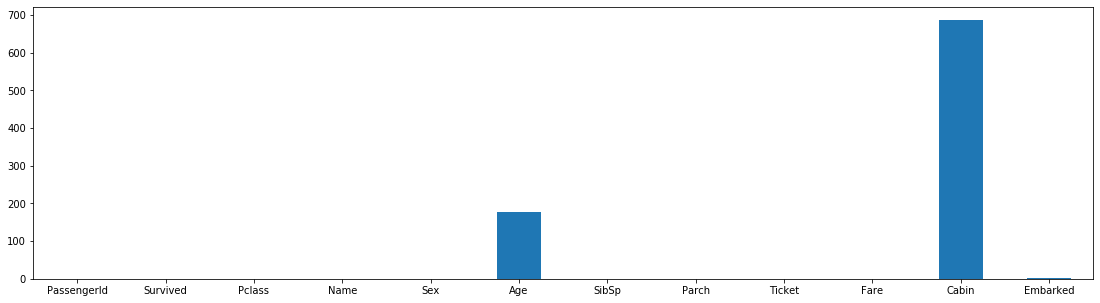

In [4]:
# 1. Create a bar chart showing how many missing values are in each column

train.isnull().sum().plot(kind='bar', figsize=(19,5))
plt.xticks(rotation=0);

In [5]:

# 2. Which column has the most `NaN` values? How many cells in that column are empty?

train.isnull().sum().sort_values(ascending=False).head(3)

#train.count().idxmin(axis = 0, skipna= True,),\
#train.isnull().sum()[train.isnull().sum() != 0].max()

Cabin       687
Age         177
Embarked      2
dtype: int64

In [6]:
#3. Delete all rows where `Embarked` is empty

# A.

train.Embarked.value_counts(dropna= True)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
#B.

#train.dropna(subset=['Embarked'], inplace=True, axis=0)

train = train[train.Embarked.notnull()]
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
train.shape

(889, 12)

In [9]:
# 4. Fill all empty cabins with the symbol: **¯\\_(ツ)_/¯**

train.Cabin.fillna(value='**¯\\_(ツ)_/¯**', inplace=True)

In [10]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,**¯\_(ツ)_/¯**,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,**¯\_(ツ)_/¯**,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
## Step 3: Feature extraction

#1.  There are two columns that pertain to how many family members 
#are on the boat for a given person.

# Create a new column called `FamilyCount` which will be the sum of those two columns.

train['FamilyCount'] = (train.SibSp) + (train.Parch)

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,**¯\_(ツ)_/¯**,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,**¯\_(ツ)_/¯**,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [12]:
# 2. Reverends have a special title in their name. 
#Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.

#train['IsReverend'] = [ 1 if x == 'Rev.' else 0 for x in train['Name']]

train['IsReverend']= train.Name.str.contains('Rev.', regex=False)

#trainadd = train.Name.str.split(',', expand=True, n=1)


In [13]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S,0,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,**¯\_(ツ)_/¯**,S,0,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,**¯\_(ツ)_/¯**,S,3,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,False


In [14]:
# 3. In order to feed our training data into a classification algorithm, 
#we need to convert our categories into 1's and 0's using `pd.get_dummies`

#- Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`.
#These columns will have 1's and 0's  


embdum = pd.get_dummies(train['Embarked'])

train = pd.concat([train, embdum], axis =1)

train = train.rename(columns={'C':'Embarked_C','Q':'Embarked_Q', 'S':'Embarked_S'})

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S,1,False,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S,0,False,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S,0,False,0,0,1


In [15]:
embdum1 = pd.get_dummies(train['Sex'])

train = pd.concat([train, embdum1], axis =1)

train = train.rename(columns={'male':'Sex_male', 'female':'Sex_female'})

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S,1,False,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S,0,False,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S,0,False,0,0,1,0,1


In [16]:
# - **BONUS**: Extract the title from everyone's name and create dummy columns

#train['title'] = 

train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.')



In [17]:

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S,1,False,0,0,1,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,1,0,0,1,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S,0,False,0,0,1,1,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,0,0,1,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S,0,False,0,0,1,0,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,**¯\_(ツ)_/¯**,S,0,True,0,0,1,0,1,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,False,0,0,1,1,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,**¯\_(ツ)_/¯**,S,3,False,0,0,1,1,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,False,1,0,0,0,1,Mr


In [18]:
train = pd.concat([train, pd.get_dummies(train["Title"], prefix = 'Title')], axis = 1)

In [19]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,0,0,0,0,0,0,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,0,1,0,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,0,0,1,0,0,0,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,0,0,0,1,0,0,0,0


In [20]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyCount',
       'IsReverend', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'Sex_male', 'Title', 'Title_Capt', 'Title_Col', 'Title_Countess',
       'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir'],
      dtype='object')

In [21]:
## Step 4: Exploratory analysis

# 1. What was the survival rate overall?

train.Survived.value_counts(normalize=True).mul(100)

0    61.754781
1    38.245219
Name: Survived, dtype: float64

In [22]:
# 2. Which gender fared the worst? What was their survival rate?

train.groupby(['Survived', 'Sex'])['Survived'].count().unstack()

Sex,female,male
Survived,,
0,81,468
1,231,109


In [23]:
#Female = len(train[(train['Sex_female'] == 1) & (train['Survived'] == 1)])
#male = len(train[(train['Sex_male'] == 1) & (train['Survived'] == 1)])

#(male/(male+Female)) * 100

In [24]:
# From over all Survivals

train[train.Survived==1].Sex.value_counts(normalize=True).mul(100)

female    67.941176
male      32.058824
Name: Sex, dtype: float64

In [25]:
# Survival Rate for each Gender

#pd.crosstab(train.Sex, train.Survived, normalize= 0).mul(100)

train.groupby(['Survived', 'Sex'])['Survived'].count()\
.unstack().apply(lambda x: x/x.sum()).mul(100)

Sex,female,male
Survived,,
0,25.961538,81.109185
1,74.038462,18.890815


In [26]:
# 3. What was the survival rate for each `Pclass`?

train.groupby(['Survived', 'Pclass'])['Survived'].count()\
.unstack().apply(lambda x: x/x.sum()).mul(100)

Pclass,1,2,3
Survived,,,
0,37.383178,52.717391,75.763747
1,62.616822,47.282609,24.236253


In [27]:
# 4. Did any reverends survive? If so, how many?

rev = train.Title_Rev.value_counts()

rev

0    883
1      6
Name: Title_Rev, dtype: int64

In [28]:
# Number of Survivals
train.Title_Rev.sum()

6

In [29]:
#5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
   
    #A.
    
train.groupby(['Cabin', 'Survived'])['Survived'].count().unstack().head(1)

Survived,0,1
Cabin,,
**¯\_(ツ)_/¯**,481.0,206.0


In [30]:
    #B.
    
cabin_objc = train.groupby(['Survived', 'Cabin'])['Survived'].count()\
.unstack().apply(lambda x: x/x.sum()).mul(100)

cabin_objc.iloc[0:2, :1]

Cabin,**¯\_(ツ)_/¯**
Survived,
0,70.014556
1,29.985444


In [31]:
# 6. What is the survival rate for people whose `Age` is empty?

#train[train['Age'].isnull()]['Survived'].value_counts(normalize=True).mul(100)

pd.crosstab([train.Age.isnull()], [train.Survived],normalize= 'index', margins=True).mul(100)


Survived,0,1
Age,,
False,59.550562,40.449438
True,70.621469,29.378531
All,61.754781,38.245219


In [32]:
# 7. What is the survival rate for each port of embarkation?

train[train.Survived==1].Embarked.value_counts(normalize=True).mul(100)



S    63.823529
C    27.352941
Q     8.823529
Name: Embarked, dtype: float64

In [33]:
# 8. What is the survival rate for children (under 12) in each `Pclass`?

train[(train.Survived==1) & (train.Age<12)].Pclass.value_counts(normalize=True).mul(100)

3    48.717949
2    43.589744
1     7.692308
Name: Pclass, dtype: float64

In [34]:
# 9. Did the captain of the ship survive? Is he on the list?

#train.[train.Survived==1].Title_Capt.value_counts()

train[(train.Title=='Capt') & (train.Survived==0)].Survived.value_counts()

#train[train.Title_Capt==1].Survived.sum()

#train[(train.Survived==1) & (train.Title_Capt==1)].Survived.sum()

0    1
Name: Survived, dtype: int64

In [35]:
# 10. Of all the people that died, who had the most expensive ticket? How much did it cost?

train.sort_values(by = ['Fare', 'Survived'], ascending=False)[train.Survived==0].head()


#sortby_Survived = train.sort_values(by = ['Survived'], ascending=True)


                  
#train[train.Survived==0].Fare.sort_values(ascending=False).max()

/Users/moathalsaleh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,...,0,0,0,0,0,1,0,0,0,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,...,0,0,0,0,0,1,0,0,0,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,...,0,0,0,0,0,1,0,0,0,0
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,...,0,0,0,0,0,1,0,0,0,0
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,...,0,0,0,0,0,1,0,0,0,0


In [36]:
# 11. Does having family on the boat help or hurt your chances of survival?

#train['Survived', 'FamilyCount']['Survived'].count()

#train[train.Survived].FamilyCount.count()

pd.pivot_table(train, index= train['FamilyCount'], aggfunc='sum', values= ['Survived'] )

,Survived
FamilyCount,
0,161
1,89
2,59
3,21
4,3
5,3
6,4
7,0
10,0


AxesSubplot(0.125,0.125;0.775x0.755)


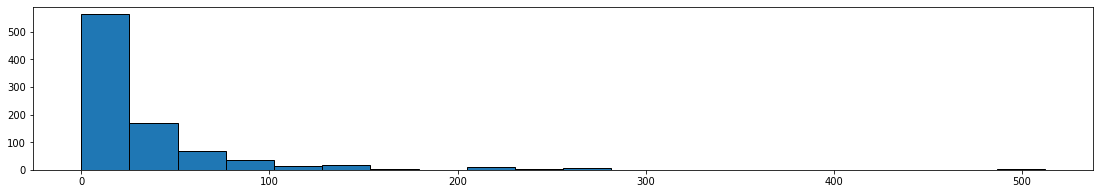

In [97]:
## Step 5: Plotting
# Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people.
# It's fine if a handful of charts are basic (Gender, Age, etc),
# but what we're really looking for is something beneath the surface.

# the destribution of fare price for the Trip

#A
print(train.Fare.hist(edgecolor='#000000', grid=False, bins=20, figsize=(19,3)));


count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

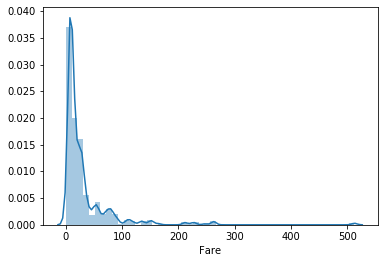

In [103]:
#B
Describ = train.Fare.describe()
sns.distplot(train.Fare, );

Describ

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Sex
female    312
male      577
Name: Survived, dtype: int64

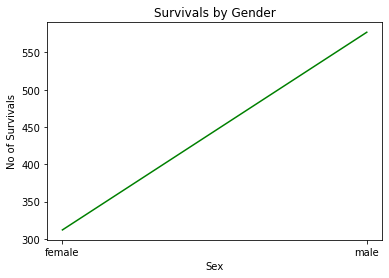

In [40]:
surv_rate_bygend = train.groupby('Sex')['Survived'].count()

plt.plot(surv_rate_bygend,color='g', )
plt.xlabel('Sex')
plt.ylabel('No of Survivals')
plt.title('Survivals by Gender')

surv_rate_bygend

Survived         0   1
Sex    Pclass         
female 1         3  89
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

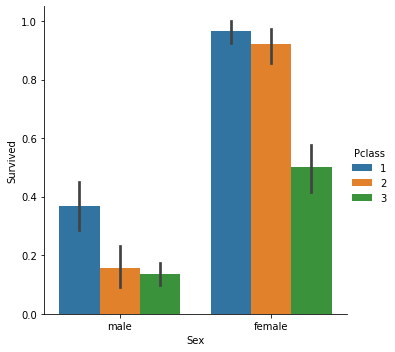

In [86]:
# an observation of the mean survival rate from each Gender and by each Class

surv_rate_bygend = train.groupby(['Sex', 'Pclass'] )['Survived'].value_counts().unstack()

sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=train);

surv_rate_bygend

Survived,0,1
Sex,,
female,81,231
male,468,109


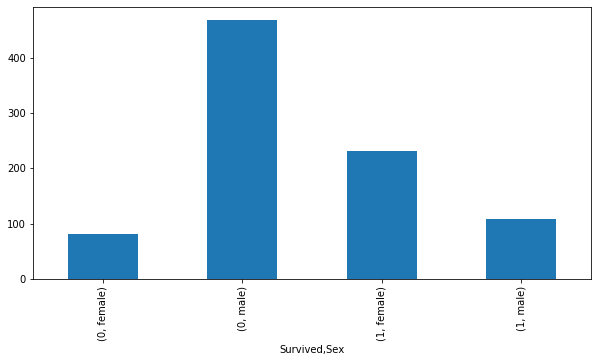

In [88]:
#showing the differences of survival rate for each gender

survived_count = train.groupby('Sex')['Survived'].value_counts().unstack()

train.groupby(['Survived','Sex']).count().Name
train.groupby(['Survived','Sex']).count().Name.plot(kind='bar', figsize=(10,5));

survived_count